In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_excel('subscribers-cs.xlsx')

In [3]:
columns = ['package_type','preferred_genre','intended_use','weekly_consumption_hour','age','male_TF','attribution_technical','attribution_survey','op_sys','plan_type','initial_credit_card_declined','join_fee','current_sub_TF','discount_price','account_creation_date','payment_period','trial_completed']
df = df[columns]
df.info()
#'account_creation_date'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227256 entries, 0 to 227255
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   package_type                  191728 non-null  object        
 1   preferred_genre               190978 non-null  object        
 2   intended_use                  223743 non-null  object        
 3   weekly_consumption_hour       189592 non-null  float64       
 4   age                           192352 non-null  float64       
 5   male_TF                       227256 non-null  bool          
 6   attribution_technical         227256 non-null  object        
 7   attribution_survey            224647 non-null  object        
 8   op_sys                        214166 non-null  object        
 9   plan_type                     227256 non-null  object        
 10  initial_credit_card_declined  227256 non-null  bool          
 11  join_fee     

In [4]:
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144083 entries, 2 to 227255
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   package_type                  144083 non-null  object        
 1   preferred_genre               144083 non-null  object        
 2   intended_use                  144083 non-null  object        
 3   weekly_consumption_hour       144083 non-null  float64       
 4   age                           144083 non-null  float64       
 5   male_TF                       144083 non-null  bool          
 6   attribution_technical         144083 non-null  object        
 7   attribution_survey            144083 non-null  object        
 8   op_sys                        144083 non-null  object        
 9   plan_type                     144083 non-null  object        
 10  initial_credit_card_declined  144083 non-null  bool          
 11  join_fee     

In [5]:
df['account_creation_date'] = df['account_creation_date'].dt.date
df['account_creation_date'] = (pd.DatetimeIndex(df['account_creation_date']).year)*100 + (pd.DatetimeIndex(df['account_creation_date']).month)

In [6]:
#def
def get_dummies(col):
    names = list(set(df[col]))
    dummies = pd.get_dummies(df[col])
    merged = pd.concat([df, dummies], axis='columns')
    final = merged.drop(columns = names[0], axis='columns')
    return final

In [7]:
#binary
# df['male_TF']= df['male_TF'].astype('category')
# df['initial_credit_card_declined']= df['initial_credit_card_declined'].astype('category')
# df['current_sub_TF']= df['current_sub_TF'].astype('current_sub_TF')

#multi
categorical_col = ['package_type','preferred_genre','intended_use','male_TF','attribution_technical','attribution_survey','plan_type','discount_price','op_sys', 'account_creation_date','payment_period']
for col in categorical_col:
    df = get_dummies(col)
    
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 144083 entries, 2 to 227255
Data columns (total 96 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  144083 non-null  object 
 1   preferred_genre               144083 non-null  object 
 2   intended_use                  144083 non-null  object 
 3   weekly_consumption_hour       144083 non-null  float64
 4   age                           144083 non-null  float64
 5   male_TF                       144083 non-null  bool   
 6   attribution_technical         144083 non-null  object 
 7   attribution_survey            144083 non-null  object 
 8   op_sys                        144083 non-null  object 
 9   plan_type                     144083 non-null  object 
 10  initial_credit_card_declined  144083 non-null  bool   
 11  join_fee                      144083 non-null  float64
 12  current_sub_TF                144083 non-nul

In [8]:
from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [9]:
feature_x = [tag for tag in df.columns if tag not in categorical_col]
print('feature:\n', feature_x)
X = df[feature_x].values

feature:
 ['weekly_consumption_hour', 'age', 'initial_credit_card_declined', 'join_fee', 'current_sub_TF', 'trial_completed', 'base', 'enhanced', 'comedy', 'international', 'other', 'regional', 'education', 'expand international access', 'expand regional access', 'other', 'replace OTT', 'supplement OTT', True, 'affiliate', 'appstore', 'bing', 'brand sem intent bing', 'brand sem intent google', 'content_greatist', 'criteo', 'direct_mail', 'discovery', 'display', 'email', 'email_blast', 'facebook', 'facebook_organic', 'google_organic', 'influencer', 'internal', 'organic', 'other', 'ott', 'pinterest', 'pinterest_organic', 'playstore', 'podcast', 'quora', 'referral', 'samsung', 'search', 'tv', 'vod', 'youtube', 'affiliate', 'amfm_radio', 'direct_mail', 'facebook', 'facebook_organic', 'other', 'ott', 'pinterest', 'podcast', 'public_radio', 'referral', 'search', 'social_organic', 'tv', 'youtube', 'high_14', 'low_14', 4.0737, 4.22049999999999, 4.36729999999999, 4.5141, 5.0279, 'Android', 2019

# GMM

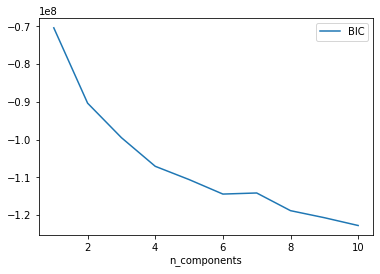

In [10]:
# How many clusters?
n_components = np.arange(1, 11)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state= 2020).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

In [11]:
# GMM
GMM = mixture.GaussianMixture(n_components=4, covariance_type='full')
gmm = GMM.fit(X)
labels = gmm.predict(X)
df_GMM = df
df_GMM['cluster'] = labels
df_GMM.to_csv('clusteredMA-GMM-1106.csv')

# K-MEANS

In [10]:
# Importing MinMaxscalar module  
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
# fitting 
X_scaled = minmaxscaler.fit_transform(X) 

In [11]:
features = df.columns
#num_features = len(features)
X = df[features].values
num_samples, num_features = X.shape
print('feature dim:', X.shape)

feature dim: (144083, 132)


{2: 0.10413104588219739, 3: 0.10043082292006633, 4: 0.07935772583893176, 5: 0.09475728682181186, 6: 0.08891975806897037, 7: 0.08908661946453253, 8: 0.08494732070440816, 9: 0.07758460249568847, 10: 0.07511266335613553, 11: 0.07784079202906244, 12: 0.09278859866860892, 13: 0.09786276720417394, 14: 0.09158023281900135, 15: 0.09567762474843762, 16: 0.09566652159494868, 17: 0.10379978793785767, 18: 0.09477957026006308, 19: 0.08716422279893908}


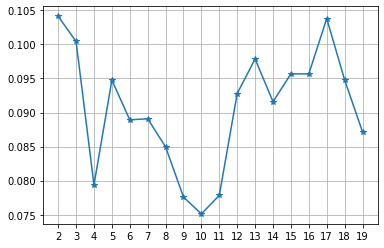

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores[k] = score
print(scores)  

a = list(scores.keys())
v = list(scores.values())
ax = plt.subplot()
ax.plot(a, v, '-*')
ax.set_xticks(np.arange(2, 20))
ax.grid()
plt.show()

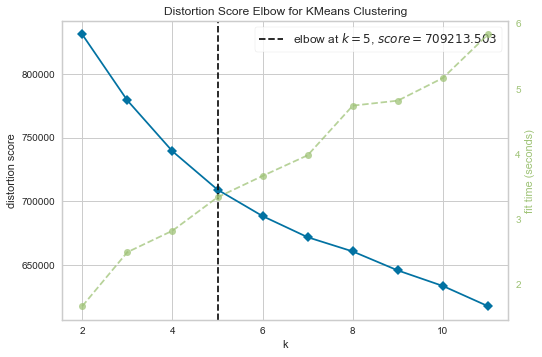

In [12]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [13]:
kmeans = KMeans(n_clusters=5, random_state=2020)
y_pred = kmeans.fit_predict(X_scaled)
df_kmeans = df
df_kmeans['cluster'] = y_pred
df_kmeans.to_csv('clusteredMA—kmeans.csv')

In [13]:
# def visualize_cluster_result(x, dim1, dim2, y_pred, k):
#     # select two feature dims: dim1, dim2, visualize the clusters
#     assert dim1 in range(x.shape[1])
#     assert dim2 in range(x.shape[1])
#     ax = plt.subplot()
#     # use a for loop to plot each cluster (with different colors)
#     for i in range(k):
#         ax.scatter(x[y_pred == i, dim1], x[y_pred ==  i, dim2], label='cluster: %d' % i)
#     plt.title('Visualization of clustering of dim %d and dim %d' % (dim1, dim2))
#     ax.set_xlabel('dim: %d' % dim1)
#     ax.set_ylabel('dim: %d' % dim2)
#     ax.legend()
#     plt.show()

In [17]:
#visualize_cluster_result(X, 2, 3, labels, 4)